# Théorème central limite pour simuler la loi normale

Binôme : 
- LARIBI Hakima
- OULD TALEB Nada

In [3]:
import numpy as np
import random
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

D'après le TCL, la somme : $$X = \frac{\sum_{i=1}^n U_i  - \frac{n}{2}}{\sqrt{\frac{n}{12}}}$$
est asymptotiquement normale N(0,1) à partir de n=3. Dans ce TP, nous allons simuler un échantillon de VA qui suit une N(0,1) pour n=3 et n=12.

## 1- Fonction TCL

In [11]:
def TCL(M,n):
    # M : taille de l'échantillon à générer
    # n : nombre de lois uniformes à générer
    X = np.zeros(M)
    for i in range(M):
        sum = 0
        for j in range(n):
            #Générer une uniforme ~ [0,1]
            U = np.random.uniform(0,1)
            sum = sum + U
        X [i] = (sum - n/2)/(np.sqrt(n/12))
    return X
            
            

## 2- TCL avec n = 3

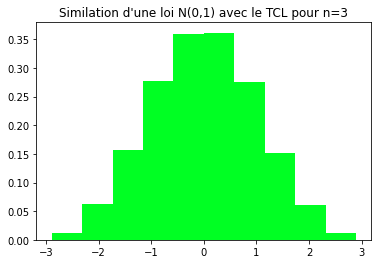

In [20]:
X = TCL(50000,3) 
plt.hist(X, density = True, color='#00FF23')
plt.title("Similation d'une loi N(0,1) avec le TCL pour n=3")
plt.show()


On va maintenant comparer la simulation obtenue avec celle de la loi normale 

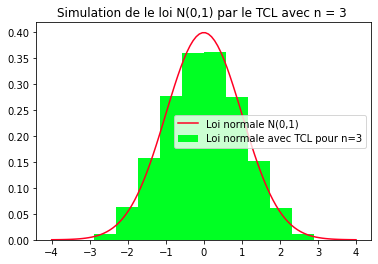

In [21]:
y = np.linspace(-4, 4, 100)
plt.hist(X, density = True,color='#00FF23',label="Loi normale avec TCL pour n=3")
plt.plot(y, norm.pdf(x,0, 1),color='#FF0023',label="Loi normale N(0,1)")
plt.title("Simulation de le loi N(0,1) par le TCL avec n = 3 ")
plt.legend()
plt.show()

## 2- TCL avec n = 12

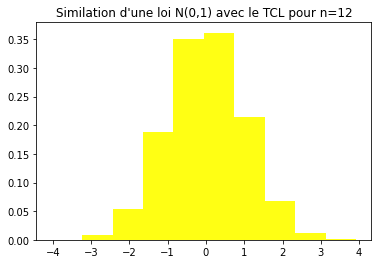

In [25]:
X = TCL(50000,12) 
plt.hist(X, density = True, color='#ffff14')
plt.title("Similation d'une loi N(0,1) avec le TCL pour n=12")
plt.show()


On va maintenant comparer la simulation obtenue avec celle de la loi normale 

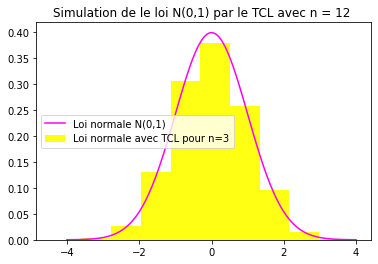

In [24]:
y = np.linspace(-4, 4, 100)
plt.hist(X, density = True,color='#ffff14',label="Loi normale avec TCL pour n=3")
plt.plot(y, norm.pdf(x,0, 1),color='#FF00F0',label="Loi normale N(0,1)")
plt.title("Simulation de le loi N(0,1) par le TCL avec n = 12 ")
plt.legend()
plt.show()

## Conclusion :
Pour conclure, la somme précédemment présentée se comporte asymptotiquement comme une loi normale pour n > 3. 

On peut également être tenté de générer une loi normale par la méthode exacte puis la comparer à la normale définie sur python. C'est ce que nous allons faire ici :

In [33]:
def LoiNormale(mu,sigma):
        ## Générer U1, U2 qui suivent une loi uniforme sur [0,1]
        U1 = np.random.uniform(0,1)
        U2 = np.random.uniform(0,1)
        
        ## Générer N1 qui suit une loi normale ~> N(pi/2,1/2*pi)
        N1= ((np.sqrt(-2*np.log(U1)))*np.cos(2*(np.pi)*U2))*sigma+mu
        return N1

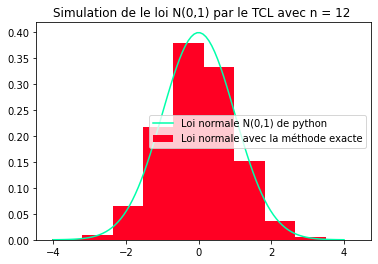

In [35]:
N = np.zeros(50000)
for i in range(50000):
    N[i] = LoiNormale(0,1)
    
y = np.linspace(-4, 4, 100)
plt.hist(N, density = True,color='#FF0023',label="Loi normale avec la méthode exacte")
plt.plot(y, norm.pdf(x,0, 1),color='#00FFAA',label="Loi normale N(0,1) de python")
plt.title("Simulation de le loi N(0,1) par le TCL avec n = 12 ")
plt.legend()
plt.show()
